In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
test_data = pd.read_csv('data/test.csv')

In [3]:
display(test_data.describe(exclude='object').T)
display(test_data.describe(exclude=np.number).T)

,count,mean,std,min,25%,50%,75%,max
id,250000.0,874999.500000,72168.927986,750000.00,812499.75,874999.50,937499.25,999999.00
Episode_Length_minutes,221264.0,419.298741,166854.502468,2.47,35.78,63.97,94.15,78486264.00
Host_Popularity_percentage,250000.0,59.716491,22.880028,2.49,39.25,59.90,79.39,117.76
Guest_Popularity_percentage,201168.0,52.192796,28.445034,0.00,28.32,53.36,76.56,116.82
Number_of_Ads,250000.0,1.355852,4.274399,0.00,0.00,1.00,2.00,2063.00


,count,unique,top,freq
Podcast_Name,250000,48,Tech Talks,7553
Episode_Title,250000,100,Episode 71,3492
Genre,250000,10,Sports,28903
Publication_Day,250000,7,Sunday,38906
Publication_Time,250000,4,Night,65440
Episode_Sentiment,250000,3,Neutral,83671


In [57]:
test_data[test_data['Number_of_Ads'] > 3]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
37939,787939,Life Lessons,Episode 94,89.84,Lifestyle,60.79,Sunday,Afternoon,62.13,89.12,Neutral
178393,928393,Tech Trends,Episode 59,7.15,Technology,71.90,Sunday,Morning,17.39,2063.00,Positive


In [58]:
test_data[test_data['Host_Popularity_percentage'] > 100]


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
59446,809446,Detective Diaries,Episode 47,71.98,True Crime,103.00,Monday,Evening,62.26,1.0,Positive
70250,820250,Lifestyle Lounge,Episode 41,105.71,Lifestyle,101.31,Sunday,Night,81.22,0.0,Neutral
88169,838169,World Watch,Episode 67,39.72,News,115.18,Friday,Morning,1.63,0.0,Negative
90886,840886,Fitness First,Episode 79,93.17,Health,117.76,Saturday,Morning,57.08,2.0,Positive
106857,856857,Detective Diaries,Episode 10,112.80,True Crime,104.60,Sunday,Evening,87.13,0.0,Positive
108106,858106,Detective Diaries,Episode 71,105.51,True Crime,101.31,Sunday,Morning,81.11,0.0,Neutral
124250,874250,Current Affairs,Episode 69,55.06,News,104.60,Monday,Night,5.63,2.0,Positive
127620,877620,Detective Diaries,Episode 50,65.09,True Crime,103.00,Monday,Evening,84.43,1.0,Positive
143693,893693,World Watch,Episode 78,10.71,News,114.93,Sunday,Afternoon,90.15,0.0,Positive
180528,930528,News Roundup,Episode 64,103.11,News,107.76,Friday,Evening,22.71,1.0,Neutral


In [59]:
test_data[test_data['Guest_Popularity_percentage'] > 100]


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
78898,828898,Detective Diaries,Episode 61,24.29,True Crime,80.60,Friday,Night,116.32,1.0,Neutral
121878,871878,Humor Hub,Episode 28,99.32,Comedy,81.54,Monday,Evening,116.82,1.0,Positive
192155,942155,Tune Time,Episode 48,102.89,Music,90.38,Monday,Night,107.21,1.0,Positive
199455,949455,Educational Nuggets,Episode 76,55.82,Education,69.43,Tuesday,Morning,115.85,2.0,Positive
211582,961582,Humor Hub,Episode 28,80.33,Comedy,71.52,Monday,Evening,116.82,1.0,Positive


In [60]:
test_data[test_data['Episode_Length_minutes'] > 125]


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
54434,804434,Current Affairs,Episode 36,7575.0,News,89.54,Saturday,Night,NaN,2.0,Negative
56597,806597,Market Masters,Episode 23,78486264.0,Business,55.45,Monday,Evening,48.5,0.0,Positive


In [61]:
test_data['Episode_Length_minutes'] = \
    test_data['Episode_Length_minutes'].apply(
        lambda x: test_data['Episode_Length_minutes'].median() if x > 125 else x
        )
    
test_data['Number_of_Ads'] = \
    test_data['Number_of_Ads'].apply(
        lambda x: test_data['Number_of_Ads'].mode() if x > 3 else x
    )
    
test_data['Host_Popularity_percentage'] = \
    test_data['Host_Popularity_percentage'].apply(
        lambda x: 100 if x > 100 else x
    ) 
    
test_data['Guest_Popularity_percentage'] = \
    test_data['Guest_Popularity_percentage'].apply(
        lambda x: 100 if x > 100 else x
    ) 

In [ ]:
data_for_test['Episode_Length_minutes'] = \
    data_for_test['Episode_Length_minutes'].apply(
        lambda x: data_for_test['Episode_Length_minutes'].median() if x > 125 else x
        )
    
data_for_test['Number_of_Ads'] = \
    data_for_test['Number_of_Ads'].apply(
        lambda x: data_for_test['Number_of_Ads'].mode() if x > 3 else x
    )
    
data_for_test['Host_Popularity_percentage'] = \
    data_for_test['Host_Popularity_percentage'].apply(
        lambda x: 100 if x > 100 else x
    ) 
    
data_for_test['Guest_Popularity_percentage'] = \
    data_for_test['Guest_Popularity_percentage'].apply(
        lambda x: 100 if x > 100 else x
    ) 

In [62]:
display(test_data.describe(exclude='object').T)
display(test_data.describe(exclude=np.number).T)

,count,mean,std,min,25%,50%,75%,max
id,250000.0,874999.500000,72168.927986,750000.00,812499.75,874999.50,937499.25,999999.00
Episode_Length_minutes,221264.0,64.547353,32.952928,2.47,35.78,63.97,94.15,120.73
Host_Popularity_percentage,250000.0,59.716117,22.879264,2.49,39.25,59.90,79.39,100.00
Guest_Popularity_percentage,201168.0,52.192433,28.444325,0.00,28.32,53.36,76.56,100.00


C:\Users\nitys\AppData\Local\Temp\ipykernel_17052\664865353.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display(test_data.describe(exclude=np.number).T)


,count,unique,top,freq
Podcast_Name,250000,48,Tech Talks,7553
Episode_Title,250000,100,Episode 71,3492
Genre,250000,10,Sports,28903
Publication_Day,250000,7,Sunday,38906
Publication_Time,250000,4,Night,65440
Number_of_Ads,250000.0,6.0,0.0,72863.0
Episode_Sentiment,250000,3,Neutral,83671


In [ ]:
test_data.groupby('Podcast_Name').count()

,id,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
Podcast_Name,,,,,,,,,,
Athlete's Arena,5662,5662,5001,5662,5662,5662,5662,4653,5662,5662
Brain Boost,3944,3944,3470,3944,3944,3944,3944,3157,3944,3944
Business Briefs,5685,5685,5005,5685,5685,5685,5685,4363,5685,5685
Business Insights,6448,6448,5687,6448,6448,6448,6448,5076,6448,6448
Comedy Corner,5258,5258,4627,5258,5258,5258,5258,4256,5258,5258
Crime Chronicles,5867,5867,5243,5867,5867,5867,5867,4784,5867,5867
Criminal Minds,5980,5980,5284,5980,5980,5980,5980,4825,5980,5980
Current Affairs,4489,4489,3902,4489,4489,4489,4489,3650,4489,4489
Daily Digest,4436,4436,3923,4436,4436,4436,4436,3552,4436,4436


In [16]:
title_list = list(test_data[test_data['Podcast_Name'] == 'World Watch']['Episode_Title'])

In [20]:
podkast_list = list(test_data.groupby('Podcast_Name').count().index)

In [22]:
nums_of_episode = set()

for name in podkast_list:
    title_list = list(test_data[test_data['Podcast_Name'] == name]['Episode_Title'])
    title_set = set(title_list)
    
    nums_of_episode.add(len(title_set))
    

In [ ]:
test_data[test_data['Podcast_Name'] == 'World Watch'].groupby('Episode_Title')['']

In [23]:
nums_of_episode

{100}

In [25]:
data = pd.read_csv('data/train.csv')

In [26]:
data

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [ ]:
display(data[data['Podcast_Name'] == 'World Watch'].groupby('Episode_Title')['Listening_Time_minutes'].mean())

series_minutes = data[data['Podcast_Name'] == 'World Watch'].groupby('Episode_Title')['Listening_Time_minutes'].mean()

some_df = pd.DataFrame(series_minutes)

Episode_Title
Episode 1      47.181748
Episode 10     48.341483
Episode 100    42.039700
Episode 11     48.024679
Episode 12     46.970876
                 ...    
Episode 95     40.797718
Episode 96     43.073157
Episode 97     40.320062
Episode 98     39.120963
Episode 99     44.553048
Name: Listening_Time_minutes, Length: 100, dtype: float64

In [ ]:
some_df = some_df.reset_index()


some_df
some_df['Episode_Title'] = some_df['Episode_Title'].apply(lambda x: int(x.split(' ')[1]))

In [ ]:
some_df = some_df.sort_values(by='Episode_Title')
some_df

,Episode_Title,Listening_Time_minutes
0,1,47.181748
12,2,45.532962
23,3,44.879087
34,4,42.722081
45,5,45.594047
...,...,...
96,96,43.073157
97,97,40.320062
98,98,39.120963
99,99,44.553048


<Axes: xlabel='Episode_Title', ylabel='Listening_Time_minutes'>

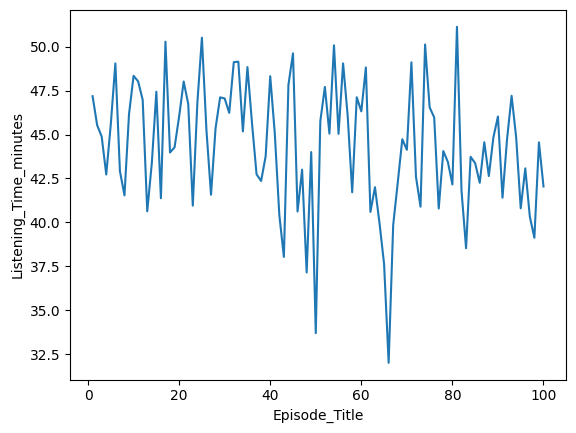

In [ ]:
sns.lineplot(data=some_df, x= 'Episode_Title', y = 'Listening_Time_minutes')

<Axes: xlabel='Episode_Title', ylabel='Listening_Time_minutes'>

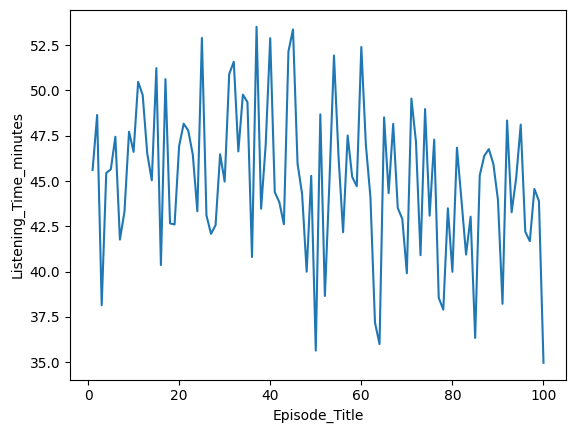

In [54]:
# display(data[data['Podcast_Name'] == 'Digital Digest'].groupby('Episode_Title')['Listening_Time_minutes'].mean())

series_minutes_2 = data[data['Podcast_Name'] == 'Digital Digest'].groupby('Episode_Title')['Listening_Time_minutes'].mean()

some_df_2 = pd.DataFrame(series_minutes_2)

some_df_2 = some_df_2.reset_index()

some_df_2['Episode_Title'] = some_df_2['Episode_Title'].apply(lambda x: int(x.split(' ')[1]))

some_df_2 = some_df_2.sort_values(by='Episode_Title')

sns.lineplot(data=some_df_2, x= 'Episode_Title', y = 'Listening_Time_minutes')


<Axes: xlabel='Episode_Title', ylabel='Listening_Time_minutes'>

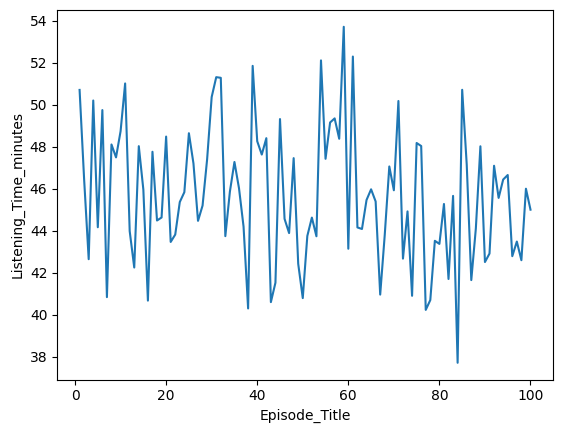

In [55]:
# display(data[data['Podcast_Name'] == 'Digital Digest'].groupby('Episode_Title')['Listening_Time_minutes'].mean())

series_minutes_3 = data[data['Podcast_Name'] == 'Learning Lab'].groupby('Episode_Title')['Listening_Time_minutes'].mean()

some_df_3 = pd.DataFrame(series_minutes_3)

some_df_3 = some_df_3.reset_index()

some_df_3['Episode_Title'] = some_df_3['Episode_Title'].apply(lambda x: int(x.split(' ')[1]))

some_df_3 = some_df_3.sort_values(by='Episode_Title')

sns.lineplot(data=some_df_3, x= 'Episode_Title', y = 'Listening_Time_minutes')
